In [2]:
import numpy as np
import pandas as pd

In [3]:
import sys
sys.path.append('../')
import util

In [62]:
data = pd.read_csv('../data/blueberry_val_dataset.csv', index_col=0)
data

,Overall Liking,Texture,Sweetness,Sourness,Flavor,LSOVERALL LIKING,LSTEXTURE,LSSWEETNESS,LSSOURNESS,LSFLAVOR,...,141-27-5,112-12-9,629-50-5,3879-26-3,689-67-8,1139-30-6,5989-33-3,43219-68-7,564-94-3,582-16-1
0,0.235,0.249,0.224,0.107,0.250,0.232,0.254,0.222,0.101,0.246,...,2.005649,-0.229453,1.415884,-0.423268,-0.066289,-0.644240,-0.520110,1.137106,-0.20207,-0.732454
1,0.175,0.251,0.192,0.226,0.278,0.172,0.256,0.189,0.221,0.273,...,2.599552,1.828292,1.415884,0.825861,0.209434,1.742866,1.561340,0.272829,-0.20207,0.865741
2,0.242,0.239,0.236,0.118,0.265,0.239,0.244,0.234,0.113,0.260,...,-0.120907,-0.779543,0.204380,-0.423268,-0.533329,-0.449639,-0.506326,-0.378920,-0.20207,0.401749
3,0.223,0.287,0.215,0.112,0.244,0.220,0.292,0.213,0.106,0.239,...,-1.059657,0.728112,1.012049,3.324119,3.433700,1.275823,0.403447,1.462981,-0.20207,-0.113798
4,0.240,0.236,0.255,0.104,0.258,0.237,0.241,0.253,0.098,0.254,...,2.082282,-0.901785,0.406297,-0.423268,-0.291368,-0.728567,0.431016,-0.081382,-0.20207,0.143976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0.205,0.268,0.221,0.206,0.277,0.192,0.250,0.209,0.202,0.261,...,0.128149,-0.168332,-0.805207,-0.423268,-0.719020,-0.332879,-0.533895,-0.336415,-0.20207,-0.732454
160,0.233,0.251,0.232,0.157,0.253,0.221,0.233,0.220,0.152,0.236,...,-1.117131,0.626243,-0.805207,-0.423268,-0.443297,0.529853,-0.713093,-0.492268,-0.20207,2.927929
161,0.298,0.310,0.266,0.133,0.291,0.285,0.292,0.255,0.128,0.274,...,-1.117131,-1.003654,-0.805207,-0.423268,-0.719020,-0.293958,-0.533895,-0.662290,-0.20207,-0.732454
162,0.264,0.294,0.259,0.146,0.287,0.251,0.276,0.247,0.141,0.270,...,-1.117131,0.524375,-0.805207,-0.423268,2.643107,2.106121,-0.079008,0.598704,-0.20207,1.948390


In [63]:
NUM_LABEL_COLS = 10
FEATURE_COLS = data.columns[NUM_LABEL_COLS:]
LABEL_COLS = data.columns[[5]]
print(FEATURE_COLS)
print(LABEL_COLS)

train_X = data[FEATURE_COLS].values
train_y = data[LABEL_COLS].values

train_X.shape, train_y.shape,

Index(['pH', 'Fructose', 'Glucose', 'Sucrose', '590-86-3', '616-25-1',
       '107-87-9', '110-62-3', '105-37-3', '623-42-7', '123-51-3', '1576-87-0',
       '71-41-0', '1576-95-0 ', '108-88-3', '556-24-1', '66-25-1 ',
       '6728-26-3 ', '928-95-0', '111-27-3 ', '123-92-2', '110-43-0',
       '111-71-7', '1191-16-8', '106-70-7', '7785-70-8', '928-68-7',
       '142-62-1', '110-93-0', '111-13-7 ', '123-66-0', '3681-71-8',
       '142-92-7', '2497-18-9', '104-76-7', '5989-27-5', '470-82-6 ',
       '122-78-1 ', '821-55-6 ', '78-70-6 ', '124-19-6 ', '2639-63-6',
       '53398-83-7', '112-40-3', '119-36-8', '106-26-3', '141-27-5',
       '112-12-9', '629-50-5', '3879-26-3', '689-67-8', '1139-30-6',
       '5989-33-3', '43219-68-7', '564-94-3', '582-16-1'],
      dtype='object')
Index(['LSOVERALL LIKING'], dtype='object')


((164, 56), (164, 1))

In [64]:
FOLDS = 4
NUM_SAMPLE_TYPES = len(data)


val_indices, train_indices = util.get_fold_indices_rand(NUM_SAMPLE_TYPES, 1, FOLDS)
# train_indices

In [65]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.model_selection import KFold
from hyperdt.ensemble import HyperbolicRandomForestClassifier as HyperRF
from sklearn.ensemble import RandomForestRegressor as SklearnRF

In [74]:
maes = []

for fold, (fold_train_indices, fold_val_indices) in enumerate(zip(train_indices, val_indices)):
    regressor = xgb.XGBRegressor(tree_method='hist', seed=42)
    # regressor = SklearnRF(random_state=42)
    # regressor = HyperRF(random_state=42)
    # for tree in regressor.trees:
    #     tree.skip_hyperboloid_check = True

    fold_train_X, fold_val_X = train_X[fold_train_indices], train_X[fold_val_indices]
    fold_train_y, fold_val_y = train_y[fold_train_indices], train_y[fold_val_indices]

    # Fitting the model
    regressor.fit(fold_train_X, fold_train_y.ravel())

    # Predict the model
    pred = regressor.predict(fold_val_X)

    mae = MAE(fold_val_y, pred)
    maes.append(mae)

    print("MAE : % f" % mae)


print("Mean MAE : % f" % np.mean(mae))

MAE :  0.030481
MAE :  0.036997
MAE :  0.041270
MAE :  0.029209
Mean MAE :  0.029209


In [199]:
res = []
avg_75_is = [105, 93, 63, 89]
# allMeanMAE 0.031182129687666888, redMeanMAE 0.03105150105357171
# allMeanMAE 0.029145603333333332, redMeanMAE 0.02911241666666667
avg_50_is = [74, 139, 116]
# allMeanMAE 0.03217908273240924, redMeanMAE 0.032285433129469555
# allMeanMAE 0.030052850000000006, redMeanMAE 0.029582500000000022
avg_167_is = [78, 112, 86]
# allMeanMAE 0.036206824373304844, redMeanMAE 0.03537722681628332
# allMeanMAE 0.031931350000000025, redMeanMAE 0.030048888888888913
avg_25_is = [132, 46]
# allMeanMAE 0.03498279405730963, redMeanMAE 0.03355175397396089
# allMeanMAE 0.031006580000000006, redMeanMAE 0.030795500000000007

for i in range(100):
    data_subset = data.sample(frac=1/6, random_state=i+42)

    train_X = data_subset[FEATURE_COLS].values
    train_y = data_subset[LABEL_COLS].values

    val_indices, train_indices = util.get_fold_indices_rand(len(train_X), 1, FOLDS)

    maes = []

    for fold, (fold_train_indices, fold_val_indices) in enumerate(zip(train_indices, val_indices)):
        regressor = xgb.XGBRegressor(tree_method='hist', seed=42)
        # regressor = SklearnRF(random_state=42)

        fold_train_X, fold_val_X = train_X[fold_train_indices], train_X[fold_val_indices]
        fold_train_y, fold_val_y = train_y[fold_train_indices], train_y[fold_val_indices]

        # Fitting the model
        regressor.fit(fold_train_X, fold_train_y.ravel())

        # Predict the model
        pred = regressor.predict(fold_val_X)

        mae = MAE(fold_val_y, pred)
        maes.append(mae)

        # print("MAE : % f" % mae)

    print("Mean MAE : % f" % np.mean(mae))
    res.append(mae)

Mean MAE :  0.037508
Mean MAE :  0.034944
Mean MAE :  0.029945
Mean MAE :  0.051338
Mean MAE :  0.040460
Mean MAE :  0.033530
Mean MAE :  0.026424
Mean MAE :  0.031213
Mean MAE :  0.039523
Mean MAE :  0.017006
Mean MAE :  0.020195
Mean MAE :  0.058291
Mean MAE :  0.055313
Mean MAE :  0.066528
Mean MAE :  0.017797
Mean MAE :  0.053469
Mean MAE :  0.029124
Mean MAE :  0.043573
Mean MAE :  0.054372
Mean MAE :  0.037651
Mean MAE :  0.028773
Mean MAE :  0.044873
Mean MAE :  0.044488
Mean MAE :  0.021894
Mean MAE :  0.061883
Mean MAE :  0.058665
Mean MAE :  0.041537
Mean MAE :  0.031871
Mean MAE :  0.043898
Mean MAE :  0.046353
Mean MAE :  0.051105
Mean MAE :  0.034446
Mean MAE :  0.034194
Mean MAE :  0.050253
Mean MAE :  0.032971
Mean MAE :  0.021929
Mean MAE :  0.033378
Mean MAE :  0.037411
Mean MAE :  0.056262
Mean MAE :  0.042102
Mean MAE :  0.020279
Mean MAE :  0.060610
Mean MAE :  0.023308
Mean MAE :  0.046811
Mean MAE :  0.036622
Mean MAE :  0.024256
Mean MAE :  0.041800
Mean MAE :  0

<h3>All data</h3>

- XGB:  MAE :  0.030644774441137543
- RF:  MAE :  0.028702863414634145

<h3>3/4 data</h3>

- XGB:  MAE :  0.031182129687666888
- RF:  MAE :  0.029145603333333332

<h3>1/2 data</h3>

- XGB:  MAE :  0.03217908273240924
- RF:  MAE :  0.030052850000000006

<h3>1/4 data</h3>

- XGB:  MAE :  0.03498279405730963
- RF:  MAE :  0.031006580000000006

<h3>1/8 data</h3>

- XGB:  MAE :  0.03908597899115086
- RF:  MAE :  0.03390328000000002


In [200]:
xgb_res = res

In [201]:
xgb_res = np.array(xgb_res)
rf_res = np.array(rf_res)

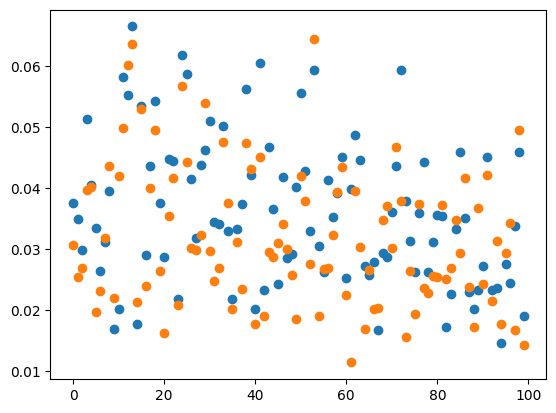

In [202]:
import matplotlib.pyplot as plt

plt.scatter(range(100), xgb_res)
plt.scatter(range(100), rf_res)
plt.show()

In [203]:
xgb_middle = set(xgb_res.argsort()[43:58])
rf_middle = set(rf_res.argsort()[43:58])

In [204]:
middle_is = [*xgb_middle.intersection(rf_middle)]
[i + 42 for i in middle_is]

[78, 112, 86]

In [205]:
print(xgb_res[middle_is])
print(rf_res[middle_is])

[0.03337838 0.03613176 0.03662154]
[0.03123667 0.030165   0.028745  ]


In [206]:
print(np.mean(xgb_res), np.mean(xgb_res[middle_is]))
print(np.mean(rf_res), np.mean(rf_res[middle_is]))

0.036206824373304844 0.03537722681628332
0.031931350000000025 0.030048888888888913
